# 1. Slides Naive Bayes Example

### Step 1: Import Necessary Libraries and Load the Car Dataset

In [1]:
import pandas as pd

# Creating the DataFrame
car_data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'color': ['Red', 'Red', 'Red', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Red', 'Red'],
    'Type': ['Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'SUV', 'SUV', 'SUV', 'SUV', 'Sports'],
    'Origin': ['Domestic', 'Domestic', 'Domestic', 'Domestic', 'Imported', 'Imported', 'Imported', 'Domestic', 'Imported', 'Imported'],
    'Was_stolen': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}

df = pd.DataFrame(car_data)
# Set 'id' as the index
df.set_index('id', inplace=True)

In [2]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


## 1.1 calculate the probability of a red car being stolen using Bayesian Theorem


$$ \large
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$
<div style="font-size: 18px;">
 Let $A$ be the event "a car is stolen" and $B$ be the event "the car is red".

- $P(A∣B)$ is the probability of a car being stolen given that it is red.

- $P(B∣A)$ is the probability of a car being red given that it is stolen.
 
- $P(A)$ is the overall probability of a car being stolen.

- $P(B)$ is the overall probability of a car being red.
</div>

In [3]:
# Calculating probabilities
 # Probability of a car being stolen
P_A = len(df[df['Was_stolen'] == 'Yes']) / len(df)               

# Probability of a car being red
P_B = len(df[df['color'] == 'Red']) / len(df) 

# Probability of a car being red given it is stolen
P_B_A = len(df[(df['color'] == 'Red') & 
               (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

print(P_A, P_B, P_B_A)
# Applying Bayesian Theorem
P_A_B = (P_B_A * P_A) / P_B 

print(f"Probability of a red car being stolen: {P_A_B:.2f}")

0.5 0.5 0.6
Probability of a red car being stolen: 0.60


In [4]:
#use color to represent the B

P_Red = P_B
P_Red_A = P_B_A
P_A_Red = P_A_B

In [5]:
P_A_Red

0.6

## 1.2 Calculate the probability of a sport car being stolen from Bayesian Theorem

 
<div style="font-size: 18px;">
 Let A be the event "a car is stolen" and Sport be the event "the car is a sports car".

- **P(A∣Sport)** is the probability of a car being stolen given that it is a sports car.

- **P(Sport∣A)** is the probability of a car being sports given that it is stolen.
 
- **P(A)** is the overall probability of a car being stolen.

- **P(Sport)** is the overall probability of a car being a sports car.
</div>

In [6]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


In [7]:
# P(A) - Probability of a car being stolen
P_A = len(df[df['Was_stolen'] == 'Yes']) / len(df)

# P(Sports) - Probability of a car being a sports car
P_Sports = len(df[df['Type'] == 'Sports']) / len(df)

# P(Sports|A) - Probability of a car being a sports car given that it is stolen
P_Sports_A = len(df[(df['Type'] == 'Sports')
                 & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

# Applying Bayesian Theorem to find P(A|Sports)
P_A_Sports =  (P_Sports_A * P_A) / P_Sports
 
print('P_Sports_A: ',P_Sports_A,'P_A: ',P_A,'P_Sports: ',P_Sports )
print(f"Probability of a sports car being stolen: {P_A_Sports:.2f}")

P_Sports_A:  0.8 P_A:  0.5 P_Sports:  0.6
Probability of a sports car being stolen: 0.67


## 1.3 Calculate the probability of a Imported car being stolen from Bayesian Theorem

 
<div style="font-size: 18px;">
 Let A be the event "a car is stolen" and Imported be the event "the car is an Imported car".

- **P(A∣Imported)** is the probability of a car being stolen given that it is Imported.

- **P(Imported∣A)** is the probability of a car being Imported given that it is stolen.
 
- **P(A)** is the overall probability of a car being stolen.

- **P(Imported)** is the overall probability of a car being a Imported car.
</div>

In [8]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


In [9]:
# P(Stolen) - Probability of a car being stolen
P_A = len(df[df['Was_stolen'] == 'Yes']) / len(df) 

# P(Imported) - Probability of a car being imported
P_Imported = len(df[df['Origin'] == 'Imported']) / len(df)

# P(Imported|Stolen) - Probability of a car being imported given that it is stolen
P_Imported_A = len(df[(df['Origin'] == 'Imported') 
                      & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes']) 

# Applying Bayesian Theorem to find P(Stolen|Imported)
P_A_Imported =  (P_Imported_A * P_A) / P_Imported


print(f"Probability of an imported car being stolen: {P_A_Imported:.2f}")
3/ 5

Probability of an imported car being stolen: 0.60


0.6

In [10]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


## 1.4 Calculate the probability of a Red Domestic SUV being stolen from Bayesian Theorem

<div style="font-size: 18px;">
Let's calculate the necessary probabilities:

-P(A) as the overall probability of a car being stolen.
 
-P(Red∣A) as the probability of a car being red given that it is stolen.
 
-P(Domestic∣A) as the probability of a car being domestic given that it is stolen.
 
-P(SUV∣A) as the probability of a car being an SUV given that it is stolen.
 
-P(A∣Red, Domestic, SUV) as the probability of a car being stolen given that it is a Red Domestic SUV.

</div>


In [11]:
# P(A) - Probability of a car being stolen
# P_A = len(df[df['Was_stolen'] == 'Yes']) / len(df)

# Assuming independence between features, calculate individual probabilities given the car is stolen
P_Red_Stolen = len(df[(df['color'] == 'Red')
                   & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

P_Domestic_Stolen =  len(df[(df['Origin'] == 'Domestic')
                        & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

P_SUV_Stolen = len(df[(df['Type'] == 'SUV')
                   & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

# Assuming independence, the joint probability P(Red, Domestic, SUV|Stolen) is the product of individual probabilities
# This is a simplification and not strictly Bayesian
P_Red_Domestic_SUV_A = P_Red_Stolen * P_SUV_Stolen



# Estimate P(Stolen|Red, Domestic, SUV) using the simplification
P_A_Red_Domestic_SUV = P_Red_Domestic_SUV_A * P_A

print(P_Red_Stolen , P_Domestic_Stolen , P_SUV_Stolen, P_A)

print(f"Estimated Probability of a Red Domestic SUV being stolen: {P_A_Red_Domestic_SUV:.3f}")


0.6 0.4 0.2 0.5
Estimated Probability of a Red Domestic SUV being stolen: 0.060


### A Red Domestic SUV not being stolen

In [15]:
# P(B) - Probability of a car being not stolen
P_B = len(df[df['Was_stolen'] == 'No']) / len(df)

# Assuming independence between features, calculate individual probabilities given the car is stolen
P_Red_NoTStolen =  len(df[(df['color'] == 'Red')
                       & (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])

P_Domestic_NotStolen = len(df[(df['Origin'] == 'Domestic')
                           & (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])

P_SUV_NotStolen = len(df[(df['Type'] == 'SUV')
                       & (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])

# Assuming independence, the joint probability P(Red, Domestic, SUV|Stolen) is the product of individual probabilities
# This is a simplification and not strictly Bayesian
P_Red_Domestic_SUV_B = P_Red_NoTStolen * P_Domestic_NotStolen * P_SUV_NotStolen



# Estimate P(Stolen|Red, Domestic, SUV) using the simplification
P_B_Red_Domestic_SUV = P_Red_Domestic_SUV_B * P_B

print(P_Red_NoTStolen , P_Domestic_NotStolen , P_SUV_NotStolen,P_B)

print(f"Estimated Probability of a Red Domestic SUV being NOT stolen: {P_B_Red_Domestic_SUV:.3f}")


0.4 0.6 0.6 0.5
Estimated Probability of a Red Domestic SUV being NOT stolen: 0.072


## 2. Calculate with Multinomial Naive Bayes

Given our dataset, we aim to calculate the probability of a Red Domestic SUV being stolen versus not being stolen using Bayes' Theorem. The theorem is represented as follows:

For the event of being stolen ($A$) given the car is a Red Domestic SUV ($RDS$):

$$
P(A | RDS) = \frac{P(RDS | A) \times P(A)}{P(RDS)}
$$

And for the event of not being stolen ($\neg A$):

$$
P(\neg A | RDS) = \frac{P(RDS | \neg A) \times P(\neg A)}{P(RDS)}
$$

Where:
- $P(A | RDS)$ is the probability of a Red Domestic SUV being stolen.
- $P(\neg A | RDS)$ is the probability of a Red Domestic SUV not being stolen.
- $P(RDS | A)$ is the probability of a car being a Red Domestic SUV given that it is stolen.
- $P(RDS | \neg A)$ is the probability of a car being a Red Domestic SUV given that it is not stolen.
- $P(A)$ is the overall probability of a car being stolen.
- $P(\neg A)$ is the overall probability of a car not being stolen.
- $P(RDS)$ is the probability of a car being a Red Domestic SUV.

Next, we will calculate these probabilities based on our dataset.


In [16]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


In [17]:

# Calculate P(Stolen) and P(Not Stolen)
P_Stolen = len(df[df['Was_stolen'] == 'Yes']) / len(df)
P_Not_Stolen = 1 - P_Stolen  # Assuming binary outcome


In [18]:
# Probabilities of being Red, Domestic, and SUV
P_Red =  len(df[df['color'] == 'Red']) / len(df)
P_Domestic = len(df[df['Origin'] == 'Domestic']) / len(df)
P_SUV = len(df[df['Type'] == 'SUV']) / len(df)

# Conditional probabilities based on being stolen or not
# These are hypothetical and need assumptions since direct data is missing
P_Red_Stolen =  len(df[(df['color'] == 'Red')
                   & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

P_Domestic_Stolen =  len(df[(df['Origin'] == 'Domestic')
                         & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

P_SUV_Stolen = len(df[(df['Type'] == 'SUV')
                   & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])


P_Red_Not_Stolen = len(df[(df['color'] == 'Red')
                       & (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No']) 

P_Domestic_Not_Stolen = len(df[(df['Origin'] == 'Domestic')
                            & (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])


P_SUV_Not_Stolen = len(df[(df['Type'] == 'SUV')
                       & (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])


In [19]:
P_Red_Stolen,P_Domestic_Stolen,P_SUV_Stolen

(0.6, 0.4, 0.2)

In [20]:
P_Red_Not_Stolen,P_Domestic_Not_Stolen,P_SUV_Not_Stolen

(0.4, 0.6, 0.6)

In [21]:
# Assuming independence for simplification
P_Stolen_Given_Red_Domestic_SUV = P_Red_Stolen * P_Domestic_Stolen * P_SUV_Stolen * P_Stolen

P_Not_Stolen_Given_Red_Domestic_SUV = P_Red_Not_Stolen * P_Domestic_Not_Stolen * P_SUV_Not_Stolen * P_Not_Stolen

In [22]:
P_Stolen_Given_Red_Domestic_SUV,P_Not_Stolen_Given_Red_Domestic_SUV 

(0.024, 0.072)

In [23]:
# Normalize probabilities so they sum to 1
total_prob = P_Stolen_Given_Red_Domestic_SUV + P_Not_Stolen_Given_Red_Domestic_SUV

P_Stolen_Given_Red_Domestic_SUV /= total_prob
P_Not_Stolen_Given_Red_Domestic_SUV /= total_prob

print(f"Estimated Probability of a Red Domestic SUV being stolen: {P_Stolen_Given_Red_Domestic_SUV:.2f}")
print(f"Estimated Probability of a Red Domestic SUV not being stolen: {P_Not_Stolen_Given_Red_Domestic_SUV:.2f}")


Estimated Probability of a Red Domestic SUV being stolen: 0.25
Estimated Probability of a Red Domestic SUV not being stolen: 0.75


# 3. Practice with Seed dataset

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Assuming you have downloaded the dataset and it's stored as 'seeds_dataset.txt'
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df_seeds = pd.read_csv(url, sep='\t', header=None, on_bad_lines='skip')  # Adjust loading parameters as necessary

# Assign column names
df_seeds.columns = ['area', 'perimeter', 'compactness', 
                    'length_of_kernel', 'width_of_kernel', 
                    'asymmetry_coefficient', 'length_of_kernel_groove', 'class']

# Display the first few rows
df_seeds.head()


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [25]:
set(df_seeds['class'].tolist())

{1, 2, 3}

## Correlation Matrix
<div style="font-size: 18px;">
A Correlation Matrix is a tool used in statistics and data analysis to measure the degree to which two variables are linearly related. It is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value of a correlation coefficient ranges between -1 and 1.

Understanding Correlation Coefficients:
- 1: A correlation of +1 indicates a perfect positive linear relationship between variables, where an increase in one variable exactly matches the increase in the other.
- 0: A correlation of 0 indicates no linear relationship between the variables.
- -1: A correlation of -1 indicates a perfect negative linear relationship between variables, where an increase in one variable matches the decrease in the other.
</div>

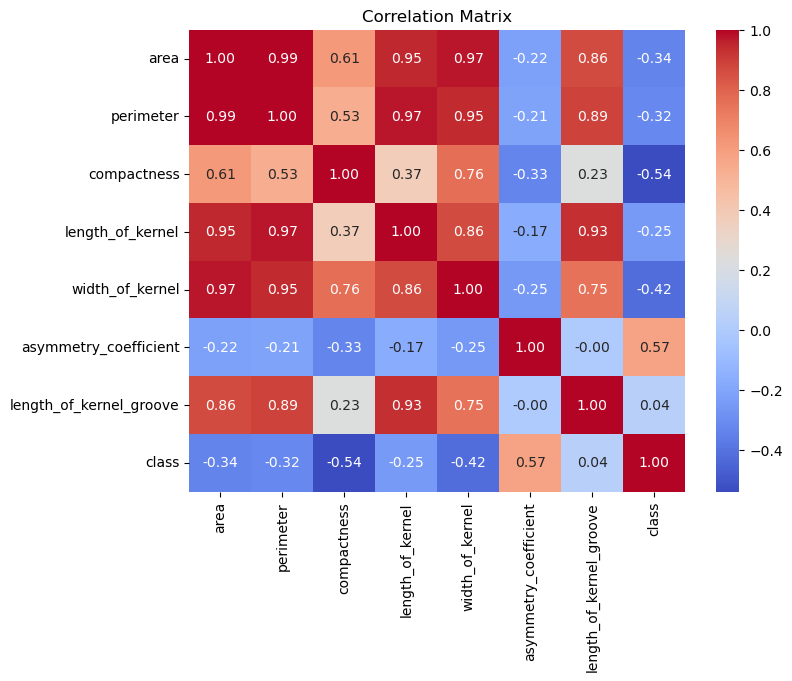

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df_seeds.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##  Naive Bayes Model

### Questions: Given the features 'length_of_kernel','asymmetry_coefficient', 'length_of_kernel_groove', along with the class labels representing different species of Seed (Seed1, Seed2, and Seed3), can we predict the species of a Seed cluster using a Naive Bayes classifier?

Accuracy: 0.7


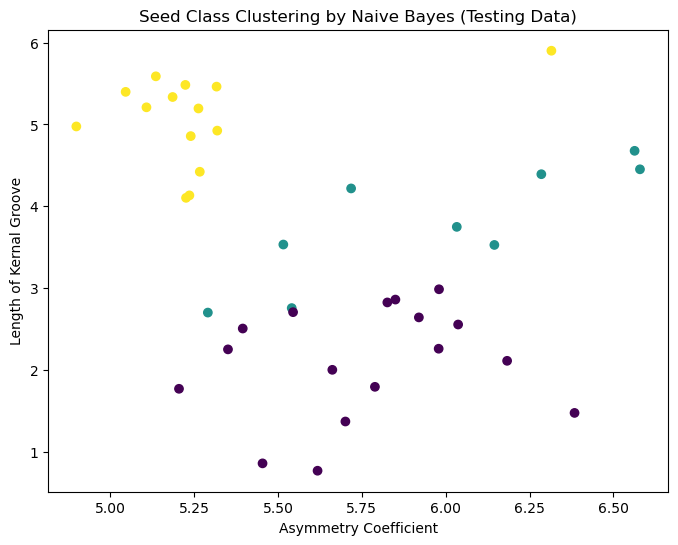

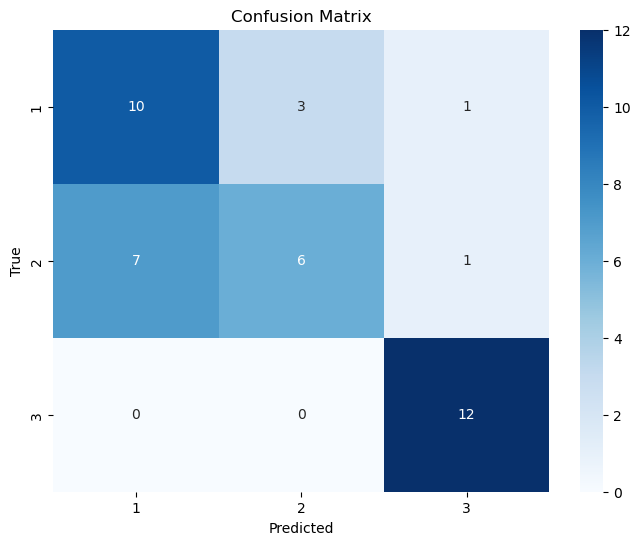

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Selecting only the desired attributes
df_attributes = df_seeds[['length_of_kernel',
                          'asymmetry_coefficient', 
                          'length_of_kernel_groove']]  # asymmetry_coefficient and length_of_kernel_groove
df_labels = df_seeds['class']  # Seed class

# new_labels = np.where(df_labels > 2, 1, 2)
# Initialize the Multinomial Naive Bayes classifier

test_labels = df_labels

X_train, X_test, y_train, y_test = train_test_split(df_attributes, test_labels, test_size=0.2, random_state=32)

clf = MultinomialNB()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred_test = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Plot the clusters for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_test, cmap='viridis')
plt.xlabel('Asymmetry Coefficient')
plt.ylabel('Length of Kernal Groove')
plt.title('Seed Class Clustering by Naive Bayes (Testing Data)')
plt.show

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Explanation:

### Please provide your explanation for your plot results.

The confusion matrix represents the actual classes with the rows and the columns are the predicted classes.  The diagonal that is present within the graph shows that many of the instances that were presented to it were correctly predicted and classified.  Everything else off of the diagonal are instances that were not fully predicted correctly.

### Use all features for Bayes classifier

In [32]:

# Split the dataset into features (X) and labels (y)
X = df_seeds.iloc[:, :-1]
y = df_seeds.iloc[:, -1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.925


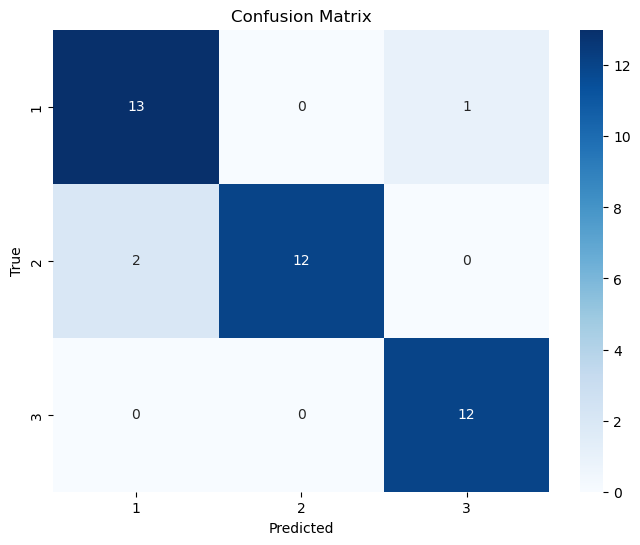

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df_seeds['class'].unique(), yticklabels=df_seeds['class'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# The Naive Bayes Family of Algorithms

The **Naive Bayes family** consists of probabilistic classifiers based on **Bayes’ Theorem**, assuming that features are **independent** of each other given the class label.

$$
P(C|X) = \frac{P(C) \cdot P(X|C)}{P(X)}
$$

Each variant differs in how it models **feature distributions** — continuous, binary, categorical, or count-based.

---

## 1. Gaussian Naive Bayes (GaussianNB)

- **Used for:** Continuous numeric features  
- **Assumption:** Each feature follows a **Gaussian (normal) distribution**  
- **Common uses:** Medical measurements, Iris dataset, exam scores  

**Formula:**

$$
P(x_i | C_k) = \frac{1}{\sqrt{2\pi\sigma_{k,i}^2}} 
\exp\left(-\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2}\right)
$$

Implemented as `GaussianNB()` in scikit-learn

## 2. Multinomial Naive Bayes (MultinomialNB)

- **Used for:** Discrete counts or frequency features  
- **Assumption:** Features represent **counts or frequencies** (non-negative integers)  
- **Common uses:** Text classification, word frequency analysis  

Implemented as `MultinomialNB()`

##  3. Bernoulli Naive Bayes (BernoulliNB)

- **Used for:** Binary (0/1) features  
- **Assumption:** Each feature represents presence or absence (True/False)  
- **Common uses:** Document classification with binary term presence  

 Implemented as `BernoulliNB()`


#  Practice Lab: Multinomial Naive Bayes on the Iris Dataset
###  Objective

In this lab, you will:

Load and explore the Iris dataset.

Train a Multinomial Naive Bayes classifier.

Evaluate the model using accuracy and confusion matrix.

Visualize predictions with a heatmap

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

### Step 2 — Load and Explore the Dataset

Requirement:

Load the Iris dataset using load_iris()

Convert it to a pandas DataFrame.

Display the first 5 rows.

In [36]:
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y
print("First 5 rows of the Iris DataFrame:")
print(iris_df.head())

First 5 rows of the Iris DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### Step 3 — Preprocessing (Scaling the Features)

Requirement:

Extract X (features) and y (target).

Apply MinMaxScaler to ensure all feature values are positive and between 0 and 1.

Split into 75% training and 25% testing data.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 4 — Train the Multinomial Naive Bayes Model

Requirement:

Initialize MultinomialNB().

Fit the model using the training data.

Print the learned class log priors.

In [41]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

### Step 5 — Make Predictions and Evaluate

Requirement:

Predict on the test data.

Print accuracy, classification report, and confusion matrix (as raw numbers).

In [42]:
y_pred = mnb.predict(X_test)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion Matrix (raw numbers):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy Score:
0.9555555555555556

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


Confusion Matrix (raw numbers):
[[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]


### Step 6 — Visualize the Confusion Matrix

Requirement:

Use Seaborn’s heatmap() to display the confusion matrix.

Label axes clearly.

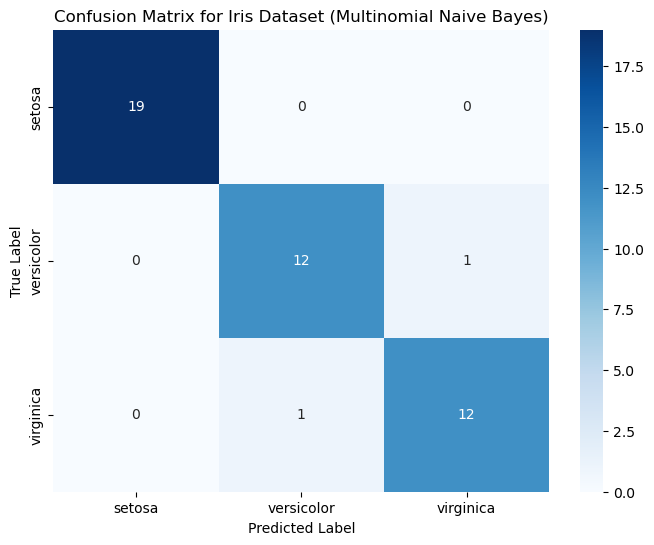

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Dataset (Multinomial Naive Bayes)')
plt.show()